<a href="https://colab.research.google.com/github/lellabhaskar/DataScience/blob/main/4p_TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Superstore data set
# https://community.tableau.com/docs/DOC-1236

!ls

 sample_data  'Sample - Superstore.xls'


In [2]:
import pandas as pd
df = pd.read_excel('Sample - Superstore.xls')
df.head()
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [3]:
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

warnings.filterwarnings("ignore") # for production use 
#never use development because warnings must be consider into bug and try to fix if it is possible.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Whenever you are working into TimeSeries analysis -> refer to TIMESTAMPS columns
# if you don't have timestamps but data is arranged in either time-ascending or descending order, take a reference timeline -> 1990-2000 
# TIMESTAMP should work like an INDEX and not input dataset 


In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [ ]:
# Based on above data, we need to analysis for TimeSeries

In [6]:
len(df)

9994

In [ ]:
# TimeSeries Analysis are two types -> Univariate and multivariate 


In [ ]:
# Univariate
# One Feature is going to fluctuate w.r.t. TIME 

In [7]:
df.tail(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.0,13.320
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.948


In [ ]:
# Based on above data, trying to findout all important Categorical data

In [8]:
df.Country.value_counts() # this is not import of categoritcal data because all values belongs to only one Country

United States    9994
Name: Country, dtype: int64

In [9]:
  df.City.value_counts() # this is also not categorical data due to Too many values for city and here anlaysis possible only some cities

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Pico Rivera        1
Iowa City          1
Keller             1
Champaign          1
Littleton          1
Name: City, Length: 531, dtype: int64

In [10]:
colNames =df.columns
for i ,feature in enumerate(colNames):
  print(colNames[i])
  #print(df[feature].value_counts())
  print(len(df[feature].value_counts()))

Row ID
9994
Order ID
5009
Order Date
1237
Ship Date
1334
Ship Mode
4
Customer ID
793
Customer Name
793
Segment
3
Country
1
City
531
State
49
Postal Code
631
Region
4
Product ID
1862
Category
3
Sub-Category
17
Product Name
1850
Sales
6144
Quantity
14
Discount
12
Profit
7545


In [ ]:
# Based on above output ,Region and Category or Sub-Category Columns are the good Categorical Data

In [11]:
colNames = df.columns 
for i, feature in enumerate(colNames):
  print(colNames[i] + " ------------ " + str(len(df[feature].value_counts())))

Row ID ------------ 9994
Order ID ------------ 5009
Order Date ------------ 1237
Ship Date ------------ 1334
Ship Mode ------------ 4
Customer ID ------------ 793
Customer Name ------------ 793
Segment ------------ 3
Country ------------ 1
City ------------ 531
State ------------ 49
Postal Code ------------ 631
Region ------------ 4
Product ID ------------ 1862
Category ------------ 3
Sub-Category ------------ 17
Product Name ------------ 1850
Sales ------------ 6144
Quantity ------------ 14
Discount ------------ 12
Profit ------------ 7545


In [ ]:
# 1) Region 2) Category 3) Sub-Category -Comparitively weaker but still valid

In [ ]:
# i have choosen Category but any one you can choose

In [12]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [13]:
furniture_data=df.loc[df['Category']=='Furniture']
furniture_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [14]:
len(furniture_data)

2121

In [15]:
print(furniture_data['Order Date'].min())
print(furniture_data['Order Date'].min())

2014-01-06 00:00:00
2014-01-06 00:00:00


In [ ]:
# Two types of numbers -> 1. Continuous  2. Discrete 
# Continuous are numerical real values and Discrete are categorical features

In [ ]:
# what is the feature that i want to predict against time?
# y=f(x) => y is a continuous number that will change as per time

In [16]:
# if i was a Logistics planner or Business Analyst ,i have chosen 'Ship Mode' is the categorical column
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [ ]:
# Continuous Variables 

In [ ]:
 # if i was Sales Person , i am interest to choose columns are Sales Profit
 # if i was Marketing Person ,i am interest to choose column Discount rather than Sales or Profit
 

In [ ]:
# Best Continuous variables to predict against time ---->  Sales	Quantity	Discount	Profit
# Here Sales and Profit are the best for continuous variables
# not suited for Continous variables here are 	Quantity(logistic Business Analyst)  and	Discount (too many zero's)

In [ ]:
# Type of Numbers
# 1.Integers -> Complete positive ,zero and negative
# 2.Real Numbers -> All integers that are not imaginary
# 3.Imaginary Numbers --> Any number under sqrt of -1

# Rational and Irrational Numbers  -> rational numbers are calcuatable numbers and irrational are PI,22/7 etc..

# Discrete and Continuous Numbers

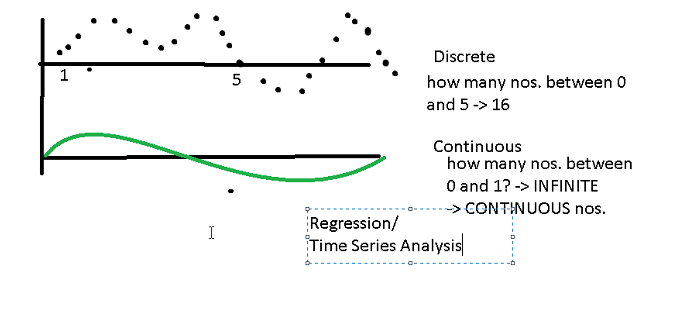

In [ ]:
# PI Chart   --> Discrete
# Histograms --> Discrete
# Line Chart --> Continuous

In [ ]:
# Demo with Sales Column

In [ ]:
# len(furniture_data)  # we have 4 years of data represented by 2121 rows of dataset
# 365 *4 --> 1460
# at least some dates have more than 1 order and maybe some dates may not orders at all.

# For TimeSeriesAnalysis ,we don't expect a GAUSSIAN distribution specially when variables are profit, loss, sales etc. 
# which either increase or decrease! they don't go bell curve

# Note: # prev cases of classification, we would have preferred uniform or gaussian or normal distribution

In [17]:
data=df.loc[df['Category']=='Furniture']

In [18]:
# ORDER BY and GROUP BY were our go to methods in SQL!
data_grouped = data.groupby('Order Date')
data_grouped = data_grouped['Sales'].sum().reset_index()
data_grouped.tail()
# Above Assumptions were correct and at least some dates have more than 1 order and some dates may not orders at all 

,Order Date,Sales
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180
888,2017-12-30,323.1360


In [ ]:
# Here Predicting Day by Day will be a mistake -> real data for this granularity does not exist
# Weekly or monthly prediction 
# Temp this week will be around 22
# M-> 22, T-> 21, W->33, .... Sun-> 21 
# Between the two, the weekly prediction have lesser chances of going wrong than daily prediction
# Monthly will be better than weekly
# Quarter will be better than monthly , annual better than quarterly 

In [19]:
data_grouped.set_index('Order Date', inplace=True)
y = data_grouped['Sales'].resample('MS').mean() # Average sales of month will be a Better prediction than Total sales 
y.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049187
Freq: MS, Name: Sales, dtype: float64

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

In [20]:
len(y) # 48 was expected for 4 years- Proper representation for all discrete timestamps

48

In [21]:
y.tail()

Order Date
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [22]:
y['2014':'2015']

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049187
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
Freq: MS, Name: Sales, dtype: float64

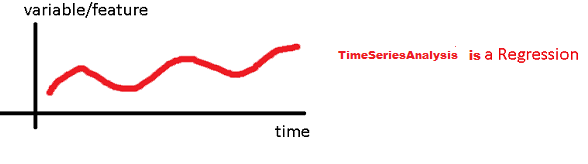

In [ ]:
# Independence Tests 
# Univariate variable for TSA -> make sure that it's an independent variable
# We preferred Sales over Profit because -> Profit was dependent on Discount and Sales 
# For BULK data -> always do an independence test 
# Profit = y = f(Sales, Discount) <- Profit was dependent 
# Sales -> y = f(order_items ) 

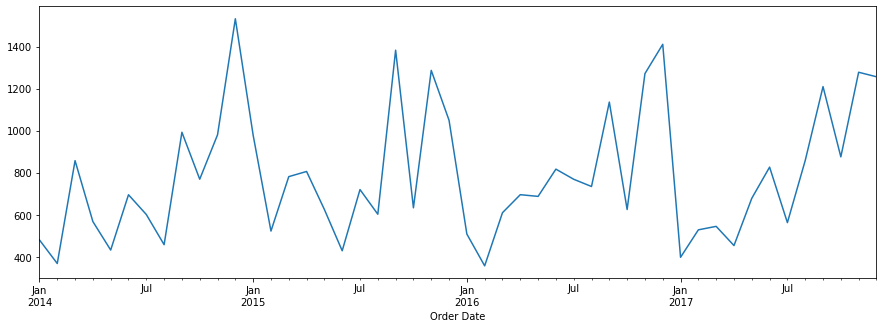

In [23]:
plt.figure()
y.plot(figsize=(15,5))
plt.show()

In [ ]:
# linear transformation

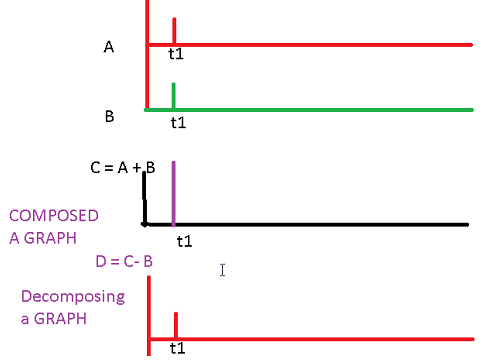

In [ ]:
# Eigenvectors and EigenValues -> 
# Vectors on which any linear transformation is applied and doesn't change its direction
# Such a vector is called Eigenvector, and its value is Eigenvalue 
# https://www.mathsisfun.com/algebra/eigenvalue.html

In [ ]:
# Old Algo for TimeSeries: 
# https://orangematter.solarwinds.com/2019/12/15/holt-winters-forecasting-simplified/

In [ ]:
# SARIMAX -> SEASONAL ARIMA EXTREME 
# SEASONS -> PERIODS or PATTERNS that repeat w.r.t. TIME 
# TREND -> whether the overall data was increasing or decreasing (slope, dy/dx )
# RESIDUE or NOISE -> Whatever is left 
# INSTEAD of making prediction on original data 
# We decompose the GRAPH into Seasons, TRENDS, RESIDUE 
# each of them is predicted separately, and then composed to get final prediction 
# AR I MA -> Auto-Regression, Integrated seasons, Moving Averages 
# we will apply all 3 algorithms to SEASONS (season present or season absent), trend, residue

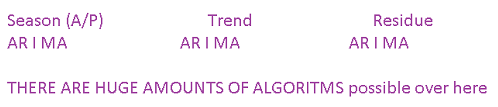

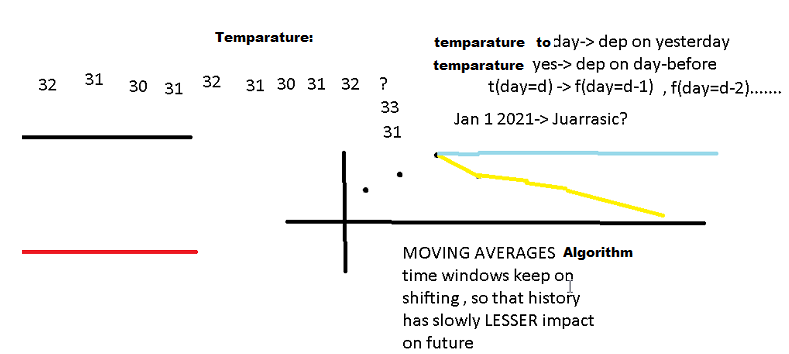

In [24]:
# MOVING AVERAGES
#time windows keep on shifting , so that history has slowly LESSER impact on future
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html


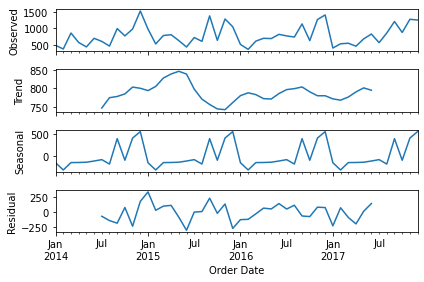

In [26]:
fig = decomposition.plot()
plt.show()

In [ ]:
2 algorithms to build these truth tables:

1) Exhaustive -> All Combinations (entire truth table will be created)

Slower
-> Grid Search

2) Not the best, but workable answer (randomly truth will be created)

Faster
-> Randome Search

https://towardsdatascience.com/random-search-vs-grid-search-for-hyperparameter-optimization-345e1422899d

Can be used to find best combination(s) of algo comparison, parameters, hyperparameters, 
metrics or wherever TOO many are present and we could select a few of them!

In [ ]:
Base 10-> because we have 10 fingers! 
EARLY man -> needed to count clubs, cattle
In math, 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9 are base ten numerals. ... 
All numbers in the number system are made by combining these 10 numerals or digits. Here, 
for instance, the number 978345162 is formed using the base 10 numerals.

1 min= 60 seconds? 1 hour = 60 mins, 1 day = 24 hours?
-> Phonecians  -> base 60 -> sundials 
Modern uses for the sexagesimal system include measuring angles, geographic coordinates, 
electronic navigation, and time. One hour of time is divided into 60 minutes, 
and one minute is divided into 60 seconds

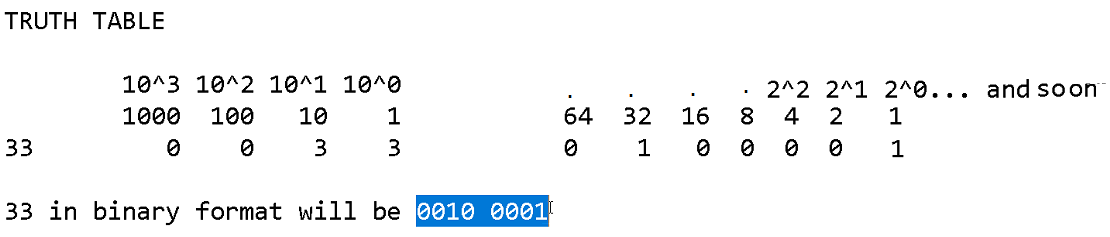

In [ ]:
# When we are building truth tables, while calculating loss on it, 
# we can end up with div by 0 situations and other exceptions also

In [ ]:
Derivates and Partial Derivatives 
# https://www.mathsisfun.com/calculus/derivatives-introduction.html 
# https://www.mathsisfun.com/calculus/derivatives-partial.html 

In [ ]:
Season,  Trend,   Residue 
AR I MA  AR I MA  AR I MA
0  1  0  0  0 1   1  1 1 
1  0  1  1  0 1   1  0 0  
Here 1 means use algo, 0 means don't use that algo


In [ ]:
https://bookdown.org/rdpeng/timeseriesbook/trend-season-residual-decomposition.html

In [28]:
# in AR I MA -> p,d,q 
p = d = q = range(0,2) # Value generators between [0,1]
pdq = list(itertools.product(p,d,q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [47]:
# Comprehention in Python 
abc = ['hello', 'world', 'xyz']
nums = range(10)
xya = [ (num/2, num%2 ) for num in nums ]
xya

[(0.0, 0),
 (0.5, 1),
 (1.0, 0),
 (1.5, 1),
 (2.0, 0),
 (2.5, 1),
 (3.0, 0),
 (3.5, 1),
 (4.0, 0),
 (4.5, 1)]

In [ ]:
#  input  is  ['hello', 'world'] X ['bye', 'bye', 'world']
#  output is  hello X [bye, bye , world] , world X ['bye', 'bye', 'world']

In [34]:
# Seasons -> manipulated manually -> at what point should I expect repeatation?
# Years   -> our repeatation is annual in nature 
seasons = 12 # my data granularity is monthly -> so to take 1 year as a Season, i have to take 12 months 
# List Comprehension -> (0,0,0) -> (0,0,0,12)
seasonal_pdq = [   (x[0],x[1],x[2], seasons)  for x in pdq  ] # if x was (0,1,0), -> (0,1,0,12)
print('Sarimax individual model = {} X {}'.format(pdq[5], seasonal_pdq[0]))
print('Sarimax individual model = {} X {}'.format(pdq[5], seasonal_pdq[1]))
print('Sarimax individual model = {} X {}'.format(pdq[5], seasonal_pdq[2]))
print('Sarimax individual model = {} X {}'.format(pdq[5], seasonal_pdq[3]))

# here is an Individual model -> with and without season 
# All such permutations will be exhaustively created 
# Every possible combination has been created 
# An sarimax -> Seasonal ARIMA Exhaustive 
# ALL possible algos with (seasonal_pdq) and without season (pdq)

Sarimax individual model = (1, 0, 1) X (0, 0, 0, 12)
Sarimax individual model = (1, 0, 1) X (0, 0, 1, 12)
Sarimax individual model = (1, 0, 1) X (0, 1, 0, 12)
Sarimax individual model = (1, 0, 1) X (0, 1, 1, 12)


In [ ]:
# How do we decide if one model is better thatn the other model?
# Metrics -> Accuracy, Precision, Recall, F1 Score, MAE, MSE....
# AKAIKE Information Criterion (for a while now, this is a Probabilistic formula to calculate
# error in liklihood/probability calculation)
# AIC = 2k - 2 ln (L) 
# L -> maximum Liklihood of the model's correctness (same formula as in RMSE,STD 
# etc, but converted into Probaility of correctness rather than actual number)
# k -> no. of samples being considered 
# for AIC, Minimum value is preferred 
# AIC is Loss Calculation -> hence more loss = bad model
# 
# we will end up with a LOT of Impossible/Imaginary/Complex/Divby0/Errors models
# LOT of these models may not even make sense, and will throw exceptions!
# Exception handling is must 

In [35]:
for param in pdq:
  for sparam in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=sparam, enforce_stationarity=False)
      predictions = model.fit()
      print('Model={}X{}. AIC= {}'.format(param, sparam, predictions.aic))
      
    except Exception as e:
      print(e)
      continue

Model=(0, 0, 0)X(0, 0, 0, 12). AIC= 769.0817523205916
Model=(0, 0, 0)X(0, 0, 1, 12). AIC= 548.1753929571319
Model=(0, 0, 0)X(0, 1, 0, 12). AIC= 477.71701309202774
maxlag should be < nobs
Model=(0, 0, 0)X(1, 0, 0, 12). AIC= 497.2314433418337
Model=(0, 0, 0)X(1, 0, 1, 12). AIC= 478.3653791055623
Model=(0, 0, 0)X(1, 1, 0, 12). AIC= 318.0047199116341
maxlag should be < nobs
Model=(0, 0, 1)X(0, 0, 0, 12). AIC= 720.9252270739954
Model=(0, 0, 1)X(0, 0, 1, 12). AIC= 514.7587051892408
Model=(0, 0, 1)X(0, 1, 0, 12). AIC= 466.5556513479083
maxlag should be < nobs
Model=(0, 0, 1)X(1, 0, 0, 12). AIC= 498.83149255462365
Model=(0, 0, 1)X(1, 0, 1, 12). AIC= 467.1039211248805
Model=(0, 0, 1)X(1, 1, 0, 12). AIC= 319.9884876946219
maxlag should be < nobs
Model=(0, 1, 0)X(0, 0, 0, 12). AIC= 677.894766859465
Model=(0, 1, 0)X(0, 0, 1, 12). AIC= 488.7011062501425
Model=(0, 1, 0)X(0, 1, 0, 12). AIC= 486.63785671879367
maxlag should be < nobs
Model=(0, 1, 0)X(1, 0, 0, 12). AIC= 497.78896630044073
Model=(0, 1, 

In [36]:
min_pdq = (999,999,999)
min_spdq = (999,999,999,12)
min_AIC = 999
for param in pdq:
  for sparam in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=sparam, enforce_stationarity=False)
      predictions = model.fit()
      print('Model={}X{}. AIC= {}'.format(param, sparam, predictions.aic))
      if(predictions.aic < min_AIC):
        min_pdq = param
        min_spdq = sparam
        min_AIC = predictions.aic
    except Exception as e:
      print(e)
      continue

print('**** Smallest PDQ,SPDQ is *****')
print(min_AIC)
print(min_pdq)
print(min_spdq)


Model=(0, 0, 0)X(0, 0, 0, 12). AIC= 769.0817523205916
Model=(0, 0, 0)X(0, 0, 1, 12). AIC= 548.1753929571319
Model=(0, 0, 0)X(0, 1, 0, 12). AIC= 477.71701309202774
maxlag should be < nobs
Model=(0, 0, 0)X(1, 0, 0, 12). AIC= 497.2314433418337
Model=(0, 0, 0)X(1, 0, 1, 12). AIC= 478.3653791055623
Model=(0, 0, 0)X(1, 1, 0, 12). AIC= 318.0047199116341
maxlag should be < nobs
Model=(0, 0, 1)X(0, 0, 0, 12). AIC= 720.9252270739954
Model=(0, 0, 1)X(0, 0, 1, 12). AIC= 514.7587051892408
Model=(0, 0, 1)X(0, 1, 0, 12). AIC= 466.5556513479083
maxlag should be < nobs
Model=(0, 0, 1)X(1, 0, 0, 12). AIC= 498.83149255462365
Model=(0, 0, 1)X(1, 0, 1, 12). AIC= 467.1039211248805
Model=(0, 0, 1)X(1, 1, 0, 12). AIC= 319.9884876946219
maxlag should be < nobs
Model=(0, 1, 0)X(0, 0, 0, 12). AIC= 677.894766859465
Model=(0, 1, 0)X(0, 0, 1, 12). AIC= 488.7011062501425
Model=(0, 1, 0)X(0, 1, 0, 12). AIC= 486.63785671879367
maxlag should be < nobs
Model=(0, 1, 0)X(1, 0, 0, 12). AIC= 497.78896630044073
Model=(0, 1, 

In [37]:
model = sm.tsa.statespace.SARIMAX(y, order=min_pdq, seasonal_order= min_spdq, enforce_stationarity=False)
results=model.fit()

In [38]:
results

In [39]:
results.summary()  # AIC -Needs to be lowest

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -145.301
Date:                            Thu, 09 Dec 2021   AIC                            298.602
Time:                                    11:37:20   BIC                            302.966
Sample:                                01-01-2014   HQIC                           299.630
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1280      0.306      0.418      0.676      -0.472       0.728
ma.L1         -0.9997    118.400     -0.008      0.993    -233.060     231.060
ar.S.L12      -0.2811      0.164     -1.716      0.086      -0.602       0.040
sigma2      3.028e+04   3.58e+06      0.008      0.993   -6.99e+06    7.05e+06
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.77
Prob(Q):                               nan   Prob(JB):                         0.68
Heteroskedasticity (H):               0.67   Skew:                            -0.22
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.1280,0.306,0.418,0.676,-0.472,0.728
ma.L1,-0.9997,118.400,-0.008,0.993,-233.060,231.060
ar.S.L12,-0.2811,0.164,-1.716,0.086,-0.602,0.040
sigma2,3.028e+04,3.58e+06,0.008,0.993,-6.99e+06,7.05e+06


In [43]:
# we've taken 2 models so that we can compare their predictions 
model = sm.tsa.statespace.SARIMAX(y, order=min_pdq, seasonal_order= min_spdq, enforce_stationarity=False)
# (0, 1, 0)X(1, 0, 1, 12)
model2 = sm.tsa.statespace.SARIMAX(y, order=(0, 1, 0), seasonal_order= (1, 0, 1, 12), enforce_stationarity=False)
results = model.fit()
results2 = model2.fit()
results2.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.S.L12,0.8597,0.093,9.206,0.000,0.677,1.043
ma.S.L12,-1.0000,0.255,-3.928,0.000,-1.499,-0.501
sigma2,4.566e+04,5.57e-06,8.19e+09,0.000,4.57e+04,4.57e+04


In [44]:
# let's check the actual predictions and plot them 
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
print(pred)

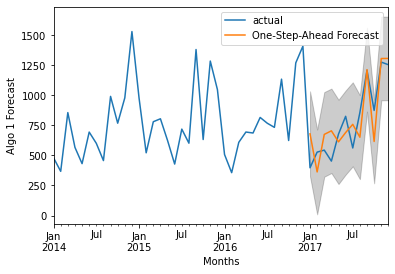

In [45]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred2 = results2.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred2_ci = pred2.conf_int()
ax = y['2014':].plot(label='actual') # Actual data plot
pred.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')
# there is always a tolerance or error kernel(region) surrounding the forecast
# +- region within which mistakes are acceptable is called Tolerance Region
# This Tolerance Region is also called Confidence Interval 
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
# Base Line-> index, lower confidence limit, upper confidence limit
ax.set_xlabel('Months')
ax.set_ylabel('Algo 1 Forecast')
plt.legend()
plt.show()

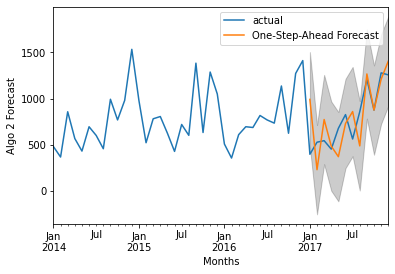

In [46]:
plt.figure()
bx = y['2014':].plot(label='actual') # ACTUAL DATA PLOT
pred2.predicted_mean.plot(ax=bx, label='One-Step-Ahead Forecast')
# there is always a tolerance or error kernel(region) surrounding the forecast
# +- region within which mistakes are acceptable 
# THIS TOLERANCE REGION is also called CONFIDENCE INTERVAL 
bx.fill_between(pred2_ci.index, pred2_ci.iloc[:,0], pred2_ci.iloc[:,1], color='k', alpha=0.2)
# BASE LINE-> index, lower confidence limit, upper confidence limit
bx.set_xlabel('Months')
bx.set_ylabel('Algo 2 Forecast')
plt.legend()
plt.show()